#Name - Samyak Jain

#Student Id - 47688408

#Bank Marketing Dataset

##Objective:                                                            
Reducing marketing resources by identifying customers who would subscribe to term deposit and thereby direct marketing efforts to them.                  
In short, predicting term deposit suscriptions.


The dataset has the following attributes:


**age** (numeric)

**job** : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")

**marital** : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)

**education** (categorical: "unknown","secondary","primary","tertiary")

**default:** has credit in default? (binary: "yes","no")

**balance:** average yearly balance, in euros (numeric)

**housing:** has housing loan? (binary: "yes","no")

**loan:** has personal loan? (binary: "yes","no")

**contact:** contact communication type (categorical: "unknown","telephone","cellular")

**day:** last contact day of the month (numeric)

**month:** last contact month of year (categorical: "jan", "feb", "mar", ..., 
"nov", "dec")

**duration:** last contact duration, in seconds (numeric)

**campaign:** number of contacts performed during this campaign and for this 

**client** (numeric,includes last contact)

**pdays:** number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)

**previous:** number of contacts performed before this campaign and for this client (numeric)

**poutcome:** outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")


**Target Variable:**
deposit : has the client subscribed to a term deposit?(binary: "yes","no")



In [1]:
#Mounting Google Drive so as to read dataset csv file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%pip install pandas_profiling

In [65]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

#ML Model Selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# ML Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib
matplotlib.rcParams['font.family'] = "arial"

In [29]:
#Loading dataset
bank = pd.read_csv('/content/drive/MyDrive/datasets/bank1.csv')

#**EDA and Visualization**

In [30]:
#Prints first 5 rows of the dataset
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [31]:
#Checking the number of rows and columns in the dataset:
print(f'There are {bank.shape[0]} rows and {bank.shape[1]} columns.')

There are 11162 rows and 17 columns.


In [32]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [33]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [34]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [35]:
#Check a sum of NULL value
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

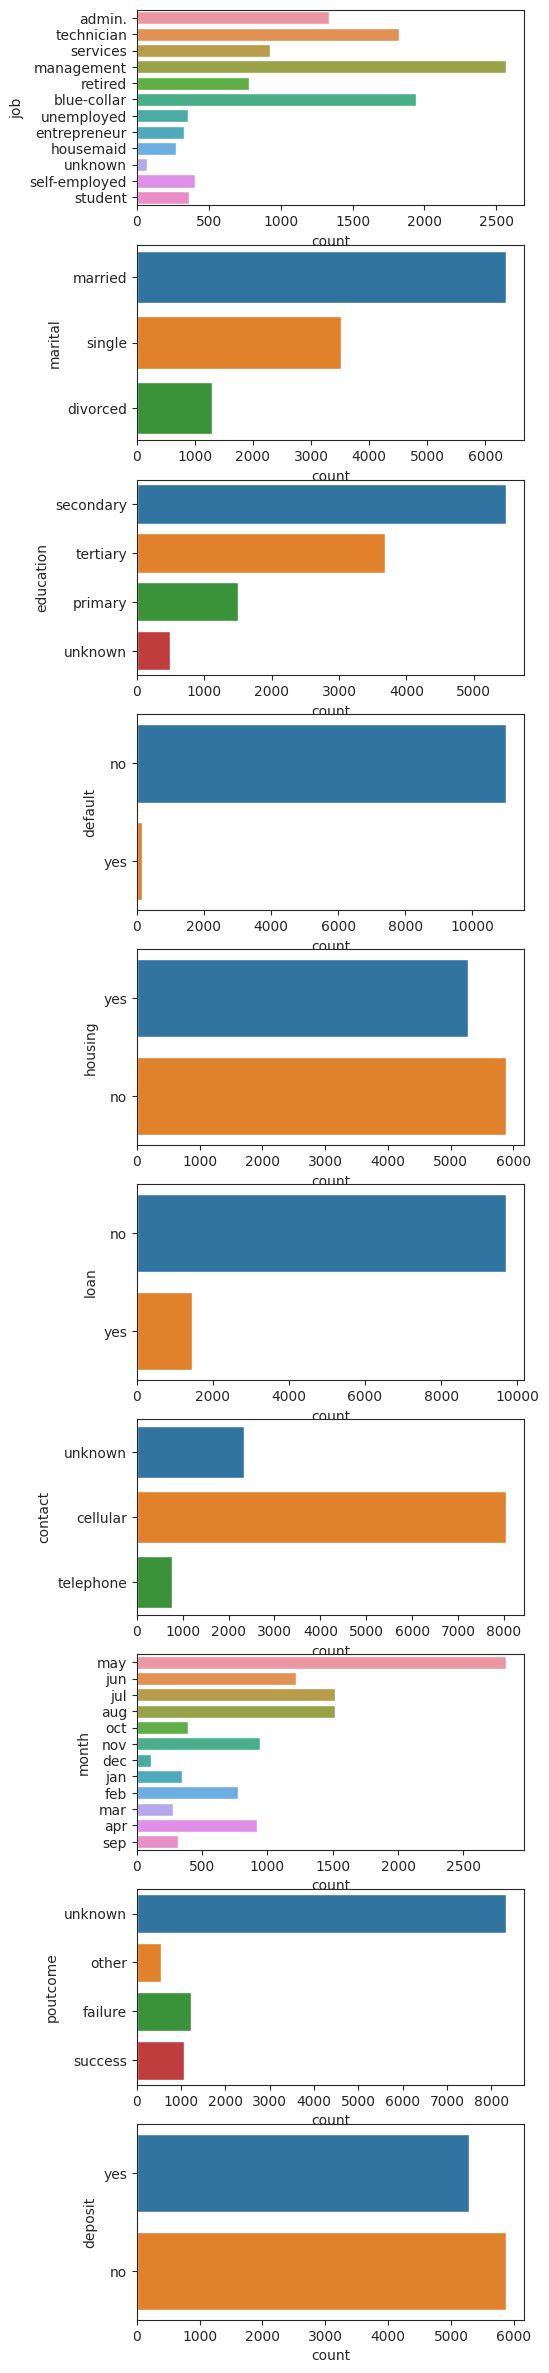

In [36]:
#Displays count of each categories for every caegorical variable
cat = ["job", "marital", "education", "default", "housing", 
       "loan", "contact", "month", "poutcome", "deposit" ]

fig, ax = plt.subplots(len(cat), 1, figsize=(5, 30))
for variable, subplot in zip(cat, ax.flatten()):
    sns.set_style("ticks")
    sns.countplot(y=bank[variable], ax=subplot, label='small')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

###Observations:

**Job:** The audiences of these campaigns target mostly administrators, blue-collars, and technicians.

**Marital** status: Most of them are married; married clients are twice as single people.

**Education:** Most clients have university education level while illiterate people are very less.

**default/credit:** Most people have no default stay on their credit file.

**housing:** Most people have no housing loan.

**loan:** Most people have no personal loan.

**contact:** Common means of communication are cellular.

**month:** May is the busy month and December is the least busy month.

**day of week:** Thursday is the most busy day while Friday is the least busy day 
of the week.

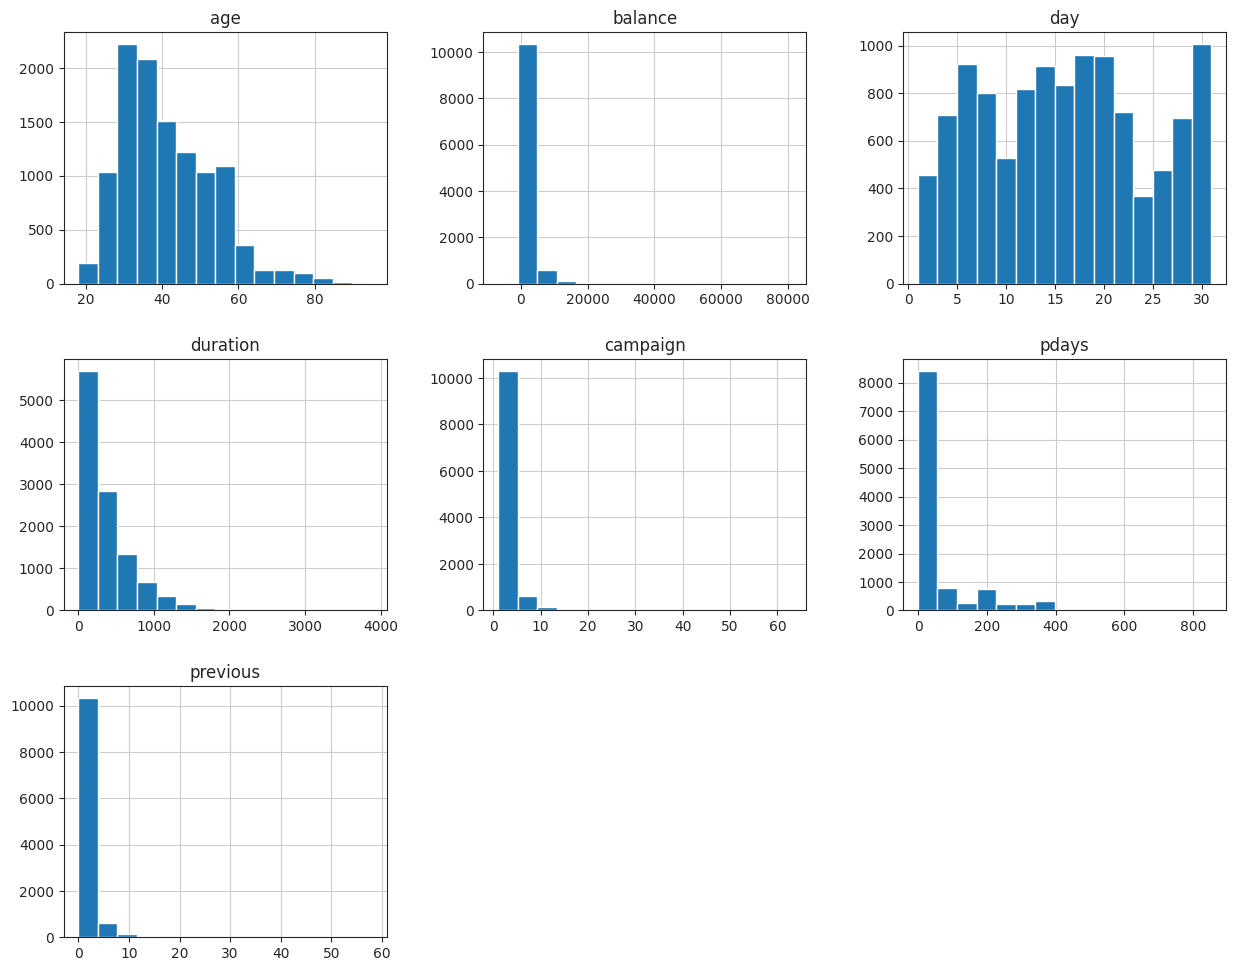

In [37]:
#Buildng histograms to visualize data distribution
bank[bank.columns].hist(bins=15, figsize=(15, 16), layout=(4, 3));


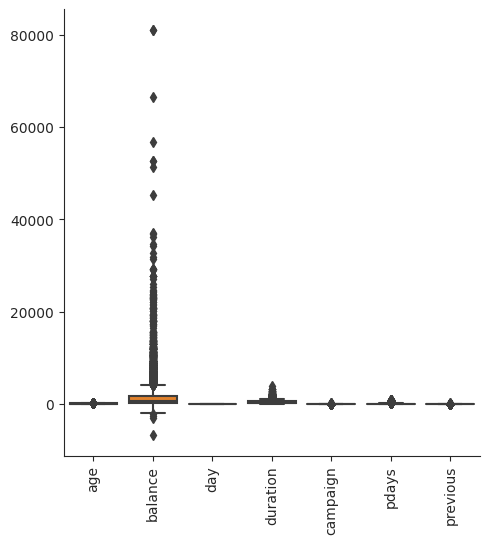

In [38]:
#Building Boxplots to visualize outliers
sns.catplot(data=bank,kind='box')
plt.xticks(rotation=90)
plt.show()

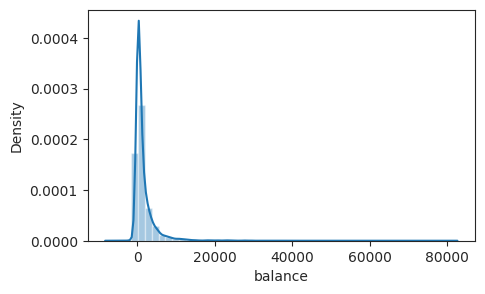

In [39]:
#We notice that there are outliers in the "balance" column
plt.figure(figsize=(5,3))
sns.distplot(bank['balance'])
plt.show()

Data above 20,000 can be suppressed to avoid the risk of outliers.


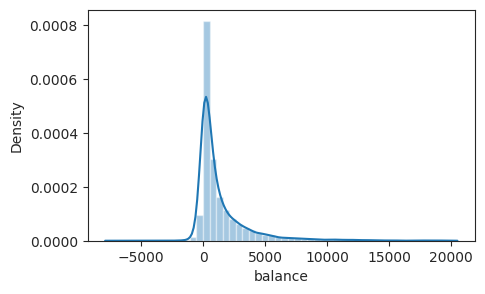

In [40]:
i=bank['balance'][bank['balance']>20000].index
bank.drop(i,inplace=True)
plt.figure(figsize=(5,3))
sns.distplot(bank['balance'])
plt.show()


Now the "balance" column seems to be somewhat normally distributed

Text(0.5, 1.0, 'Correlation Heatmap')

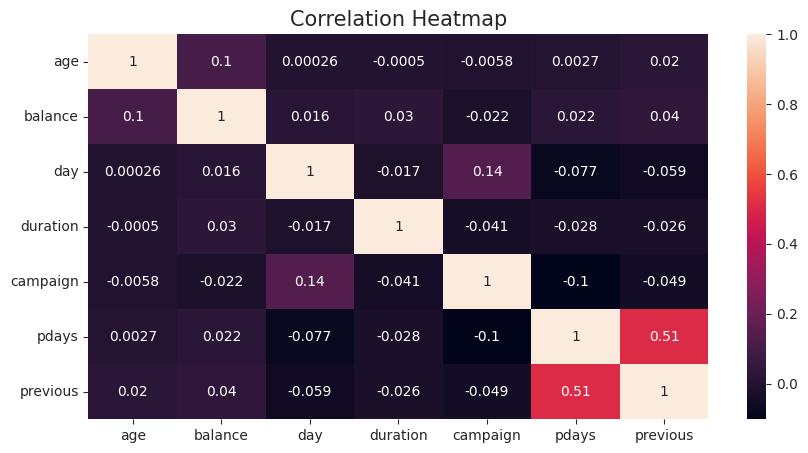

In [41]:
# Heatmap to show the correlation for each features 
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(bank.corr(),annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15})

Plotting corralation with all variables against 'deposit'. This way we can visualize what variable is correlated with 'deposit'.


<AxesSubplot: >

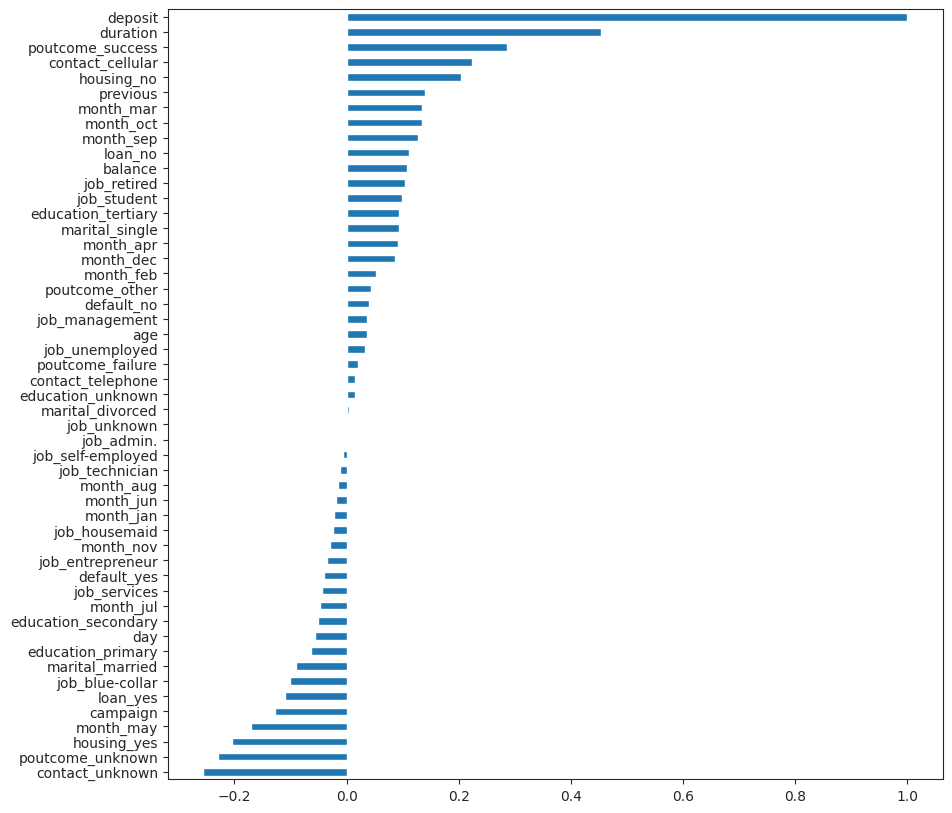

In [80]:
plt.figure(figsize=(10,10))
y = bank.corr()['deposit'].sort_values(ascending = True)
y.plot(kind="barh")

#Data Encoding

In [42]:
#Replace 'yes' values with 1 and 'no' values with 0
bank["deposit"] = np.where(bank["deposit"] == "yes", 1, 0)
bank["deposit"].nunique()
bank["deposit"].value_counts()

0    5845
1    5260
Name: deposit, dtype: int64

In [43]:
#Define all the categorical variables that needs to be encoded
catg = ['job', 'marital', 'education', 'housing', 'loan',"default", 'contact', 'month',"poutcome"]
bank= pd.get_dummies(bank, columns=catg).drop(["pdays"], axis=1)
bank.head()

,age,balance,day,duration,campaign,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


##Feature engineering

We will use 70% data for training and 30% for test.

In [44]:
# split class and features
X=bank.drop('deposit',axis=1)
y=bank['deposit']

#split into train and test (70,30)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Report spliting rows 
print("Original:", bank.shape,
      "\nX Train:",X_train.shape,
      "\nX Test:", X_test.shape,
      "\n",
      "\ny Train:", y_train.shape,
      "\ny Test:", y_test.shape)


Original: (11105, 51) 
X Train: (7773, 50) 
X Test: (3332, 50) 
 
y Train: (7773,) 
y Test: (3332,)


We will normalize the independent variables present in the dataset to a fixed range.

In [45]:
#Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [46]:
print("Mean:\n",
      np.round(np.mean(X_train,axis=0),1),
      "\nStandard Deviation:\n",
      np.round(np.std(X_train,axis=0),1))

Mean:
 [ 0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.
 -0.  0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0.
 -0.  0. -0.  0. -0.  0.  0. -0. -0. -0. -0.  0. -0.  0.] 
Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


#Model Building

1.Logistic Regression

In [47]:
log=LogisticRegression(random_state=42)
log_mod = log.fit(X_train,y_train)

print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1737
           1       0.83      0.79      0.81      1595

    accuracy                           0.82      3332
   macro avg       0.82      0.82      0.82      3332
weighted avg       0.82      0.82      0.82      3332



We can observe from classificatin report that accuracy is around 82%.

In [52]:
#This will be later used to compare models
report_log_test =classification_report(y_test,log.predict(X_test), output_dict=True )
report_log_train =classification_report(y_train,log.predict(X_train), output_dict=True )

ROC_AUC_SCORE


roc_auc_score is defined as the area under the ROC curve, which is the curve having False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds

In [53]:
print(roc_auc_score(y_test,log.predict_proba(X_test)[:,1]))

0.9017763845350053


Building ROC curve for Logistic Model

In [54]:
log_y_pred = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, log_y_pred)

Text(0, 0.5, 'TPR (Recall)')

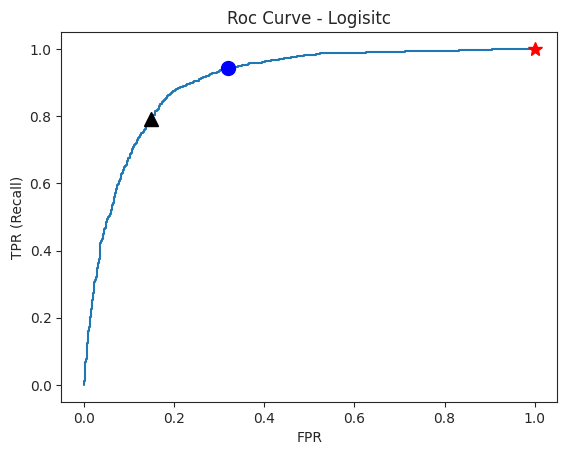

In [55]:
pt=np.argmin(np.abs(thresholds-0.5))
newpt=np.argmin(np.abs(thresholds-0.25))
thirdpt=np.argmin(np.abs(thresholds-0.0001))

plt.title("Roc Curve - Logisitc")
plt.plot(fpr,tpr,label='rf')
plt.plot(fpr[pt],tpr[pt],'^',c='k',markersize=10)
plt.plot(fpr[newpt],tpr[newpt],'o',c='b',markersize=10)
plt.plot(fpr[thirdpt],tpr[thirdpt],'*',c='r',markersize=10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

Analysis

We notice from the Logistic Model that the accuracy score(ROC) is 90.17% accurate which is very high and it perform very well with our dataset.

##2. KNearestNeighbours(KNN)

In [56]:
for i in range(2,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    Y_pred = knn.predict(X_test)
    Y_test_pred =  knn.predict(X_test)
    knn_test_accuracy = accuracy_score(y_test,Y_pred)
    knn_train_accuracy = knn.score(X_train,y_train)
     
    
    print(f"For K={i} The test accuracy score is {knn_test_accuracy*100:.2f}%".format(i,knn_test_accuracy))
    print(f"For K={i} The train accuracy score is {knn_train_accuracy*100:.2f}%".format(i,knn_train_accuracy))
    
    print()

For K=2 The test accuracy score is 69.51%
For K=2 The train accuracy score is 84.97%

For K=3 The test accuracy score is 74.58%
For K=3 The train accuracy score is 86.22%

For K=4 The test accuracy score is 72.51%
For K=4 The train accuracy score is 81.98%

For K=5 The test accuracy score is 75.90%
For K=5 The train accuracy score is 83.34%

For K=6 The test accuracy score is 73.65%
For K=6 The train accuracy score is 80.46%

For K=7 The test accuracy score is 75.81%
For K=7 The train accuracy score is 81.46%

For K=8 The test accuracy score is 74.22%
For K=8 The train accuracy score is 79.16%

For K=9 The test accuracy score is 75.42%
For K=9 The train accuracy score is 80.37%

For K=10 The test accuracy score is 73.83%
For K=10 The train accuracy score is 78.58%

For K=11 The test accuracy score is 74.64%
For K=11 The train accuracy score is 79.54%

For K=12 The test accuracy score is 74.13%
For K=12 The train accuracy score is 77.74%

For K=13 The test accuracy score is 74.34%
For K

We observe that For k=5, we get best performance for test and train. So, we proceed with k = 5.

In [57]:
#KNN performance evaluation for k = 5
knn5= KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)
knn5_train_pred = knn5.predict(X_train)
knn5_test_pred = knn5.predict(X_test)
print("The training set report: \n",classification_report(y_train,knn5_train_pred))
print("The test set report: \n",classification_report(y_test,knn5_test_pred))

The training set report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      4108
           1       0.85      0.78      0.82      3665

    accuracy                           0.83      7773
   macro avg       0.84      0.83      0.83      7773
weighted avg       0.83      0.83      0.83      7773

The test set report: 
               precision    recall  f1-score   support

           0       0.74      0.84      0.78      1737
           1       0.79      0.67      0.73      1595

    accuracy                           0.76      3332
   macro avg       0.76      0.76      0.76      3332
weighted avg       0.76      0.76      0.76      3332



In [58]:
report_knn5_test =classification_report(y_test,knn5_test_pred, output_dict=True )
report_knn5_train =classification_report(y_train,knn5_train_pred, output_dict=True )

Buildng ROC curve for KNN

In [59]:
knn_y_pred = knn5.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, knn_y_pred)

In [60]:
print(roc_auc_score(y_test,knn_y_pred))

0.8158909083690217


Text(0, 0.5, 'TPR (Recall)')

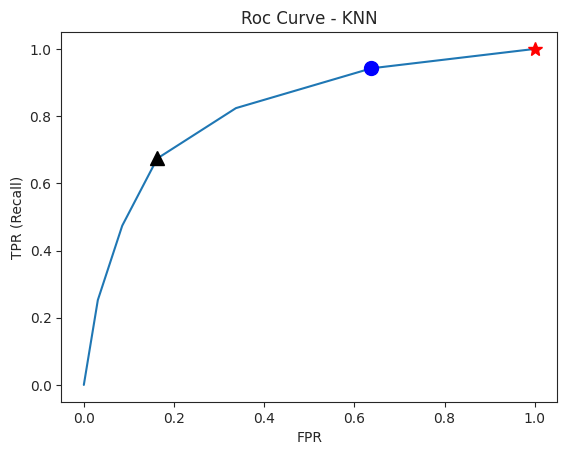

In [61]:
pt=np.argmin(np.abs(thresholds-0.5))
newpt=np.argmin(np.abs(thresholds-0.25))
thirdpt=np.argmin(np.abs(thresholds-0.0001))

plt.title("Roc Curve - KNN")
plt.plot(fpr,tpr,label='rf')
plt.plot(fpr[pt],tpr[pt],'^',c='k',markersize=10)
plt.plot(fpr[newpt],tpr[newpt],'o',c='b',markersize=10)
plt.plot(fpr[thirdpt],tpr[thirdpt],'*',c='r',markersize=10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

3.Random Forest

In [66]:
num_trees=[50,300,1000]
cvres=[]
for num in num_trees:
    rf_cv_clf = RandomForestClassifier(n_estimators = num,random_state=5)
    cvclf = cross_validate(rf_cv_clf, X_train, y_train, cv=5, scoring='f1')
    cvres.append(cvclf['test_score'].mean())


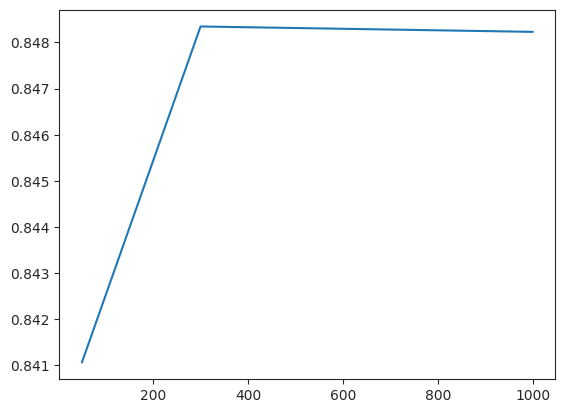

In [67]:
plt.plot(num_trees,cvres)


In [68]:
rf = RandomForestClassifier(n_estimators = 300,random_state=5).fit(X_train,y_train)


In [69]:
print(classification_report(y_test,rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1737
           1       0.82      0.88      0.85      1595

    accuracy                           0.85      3332
   macro avg       0.85      0.85      0.85      3332
weighted avg       0.85      0.85      0.85      3332



Text(0, 0.5, 'TPR (Recall)')

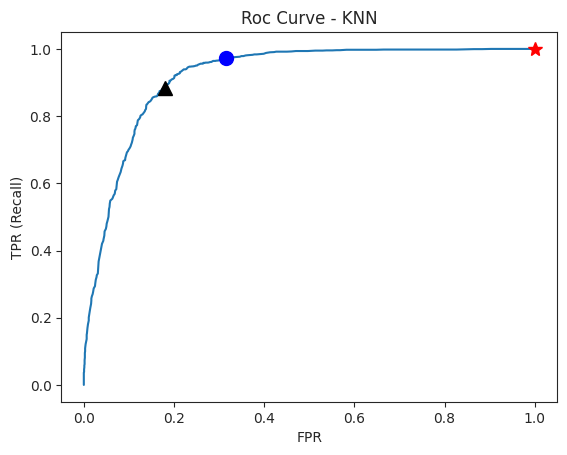

In [79]:
fpr, tpr, thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

pt=np.argmin(np.abs(thresholds-0.5))
newpt=np.argmin(np.abs(thresholds-0.25))
thirdpt=np.argmin(np.abs(thresholds-0.0001))

plt.title("Roc Curve - KNN")
plt.plot(fpr,tpr,label='rf')
plt.plot(fpr[pt],tpr[pt],'^',c='k',markersize=10)
plt.plot(fpr[newpt],tpr[newpt],'o',c='b',markersize=10)
plt.plot(fpr[thirdpt],tpr[thirdpt],'*',c='r',markersize=10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

In [71]:
report_rf_test =classification_report(y_test,rf.predict(X_test), output_dict=True )
report_rf_train =classification_report(y_train,rf.predict(X_train), output_dict=True )

###Comparing model performance on the basis of 'accuracy', 'precision', 'recall' and 'f1 for train and test sets.

In [78]:
print("--------Accuracy--------")
print("Logisitc:\n",accuracy_score(y_test,log.predict(X_test)),
     "\nRandom Forest:\n",accuracy_score(y_test,rf.predict(X_test)),
     "\nKNN:\n", accuracy_score(y_test,knn.predict(X_test)))

--------Accuracy--------
Logisitc:
 0.8226290516206483 
Random Forest:
 0.8517406962785115 
KNN:
 0.7463985594237695


In [75]:
scores_data = {'model_name':  ['KNN5', 'Logistic', 'Random Forest'],
        'accuracy_train': [report_knn5_train['accuracy'], report_log_train['accuracy'], report_rf_train['accuracy']],
          'accuracy_test': [report_knn5_test['accuracy'], report_log_test['accuracy'], report_rf_test['accuracy']],
          'precision_train': [report_knn5_train['macro avg']['precision'] ,report_log_train['macro avg']['precision'],report_rf_train['macro avg']['precision']] ,
          'precision_test': [report_knn5_test['macro avg']['precision'] ,report_log_test['macro avg']['precision'],report_rf_test['macro avg']['precision']] ,
          'recall_train': [report_knn5_train['macro avg']['recall'] ,report_log_train['macro avg']['recall'], report_rf_train['macro avg']['recall']] ,
          'recall_test': [report_knn5_test['macro avg']['precision'],report_log_test['macro avg']['recall'],report_rf_test['macro avg']['precision']] ,
          'f1_train': [report_knn5_train['macro avg']['f1-score'],report_log_train['macro avg']['f1-score'],report_rf_train['macro avg']['f1-score']] ,
          'f1_test': [report_knn5_test['macro avg']['f1-score'] ,report_log_test['macro avg']['f1-score'],report_rf_test['macro avg']['f1-score']] 
        }
scores = pd.DataFrame(scores_data)
scores.set_index('model_name', inplace=True)

In [76]:
output = scores.style.format({
    'accuracy_train': '{:,.2%}'.format,
    'accuracy_test': '{:,.2%}'.format,
    'precision_train': '{:,.2%}'.format,
    'precision_test': '{:,.2%}'.format,
    'recall_train': '{:,.2%}'.format,
    'recall_test': '{:,.2%}'.format,
    'f1_train': '{:,.2%}'.format,
    'f1_test': '{:,.2%}'.format,
})
output


,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
model_name,,,,,,,,
KNN5,83.34%,75.90%,83.58%,76.41%,83.06%,76.41%,83.18%,75.58%
Logistic,82.94%,82.26%,82.97%,82.32%,82.77%,82.14%,82.84%,82.19%
Random Forest,100.00%,85.17%,100.00%,85.28%,100.00%,85.28%,100.00%,85.17%


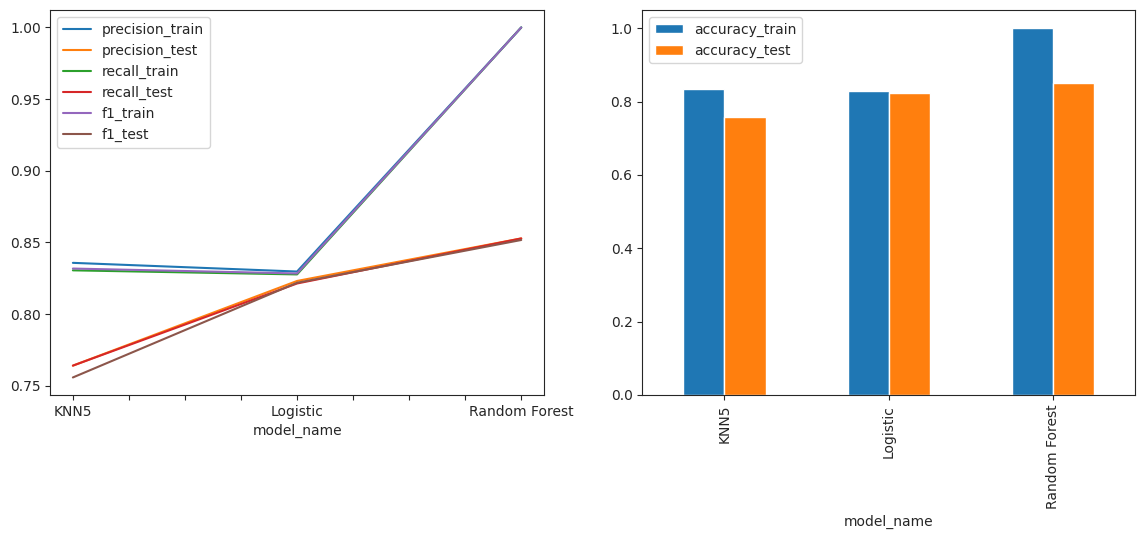

In [77]:
fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
score1=scores.loc[:,["precision_train","precision_test","recall_train","recall_test","f1_train","f1_test"]]
score1.plot(kind="line", figsize = (14, 5),ax=ax1)

score2=scores.loc[:,["accuracy_train","accuracy_test"]]
score2.plot(kind="bar", figsize = (14, 5),ax=ax2)

plt.show()

##**Analysis**

Accuracies - 
Logisitc: 0.8226 
Random Forest: 0.8517 
KNN: 0.7463

After building different Models we want to come to better accuracy score and found that Random Forest is doing the slightly better with 85.17% accuracy than Logisitcs of 82.26% and has higher prediction for 0 and 1 of clients who subscribed for the term depoist. We see that RF has prediction of client subscribed a term deposit about 613 correct vs in Logisitcs with 566 clients who did subscribed. That means we have better prediction in Random Forest. KNN model did perform well with 74.63 % although it has some fallbacks due to the amount of variables.

What I am trying to do is to use different models and observe each model accuracy to see which one perfomring despite the imbalance in the dataset. Also, by looking at the precision and recall of each model, we see that the recall on Random Forest is much higher thant Logisitic and KNN. which tell us how the false positive is minimized since we care about poeople who did subscribed. 

The data is imbalanced and this the biggest issue we have since its predicting higher % of (0) and very low on (1).